In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import os

### 適用結果の精度

In [2]:
# 提案方法の評価対象logの読み込み
eval_list = ["eval29", "eval31", "eval35"]
model_list = ["v" + str(i) for i in range(1, 21)]
proposal_accs = []

for eval_v in eval_list:
    accs = []
    for model_v in model_list:
        path = os.path.join("../proposal/eval/result", eval_v, model_v, "log.json")
        with open(path) as f:
            log = json.load(f)
        acc = log[-1]["test_acc"]
        accs.append(acc)
    proposal_accs.append(accs)

In [26]:
from collections import defaultdict
dic = defaultdict(list)
y = proposal_accs
for i, (a,b,c) in enumerate(zip(y[0][:15], y[1][:15], y[2][:15])):
    dic[i] = [a,b,c]
df = pd.DataFrame(dic, index=["1回目", "2回目", "3回目"])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1回目,0.400000,0.550000,0.777778,0.758333,0.820000,0.827778,0.876190,0.841667,0.870370,0.866667,0.854545,0.880556,0.874359,0.87381,0.893333
2回目,0.366667,0.666667,0.744444,0.791667,0.820000,0.822222,0.871429,0.854167,0.844444,0.853333,0.857576,0.877778,0.866667,0.85000,0.871111
3回目,0.566667,0.683333,0.766667,0.775000,0.786667,0.783333,0.857143,0.850000,0.851852,0.880000,0.869697,0.866667,0.887179,0.87381,0.873333


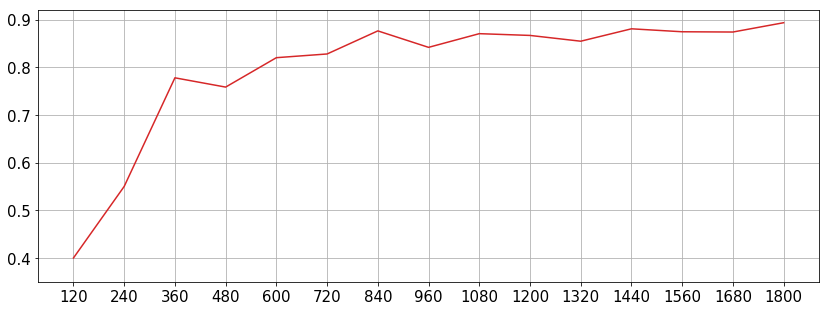

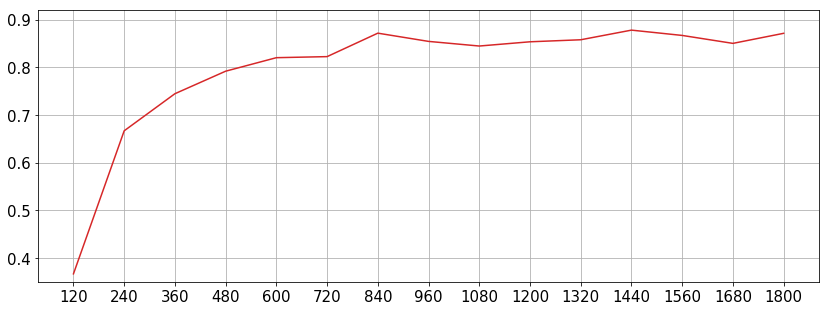

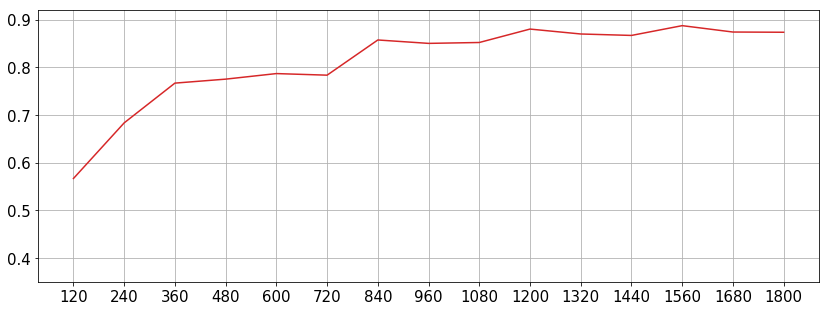

In [30]:
xlist = list(range(1, 16))

fig1 = plt.figure(figsize=(14,5))
plt.ylim(0.35, 0.92)
plt.xticks(xlist, list(range(120, 120*15+1, 120)), fontsize=15)
plt.yticks(fontsize=15)
plt.plot(xlist, proposal_accs[0][:15], color="tab:red")
plt.grid(True)

fig2 = plt.figure(figsize=(14,5))
plt.ylim(0.35, 0.92)
plt.xticks(xlist, list(range(120, 120*15+1, 120)), fontsize=15)
plt.yticks(fontsize=15)
plt.plot(xlist, proposal_accs[1][:15], color="tab:red")
plt.grid(True)

fig3 = plt.figure(figsize=(14,5))
plt.ylim(0.35, 0.92)
plt.xticks(xlist, list(range(120, 120*15+1, 120)), fontsize=15)
plt.yticks(fontsize=15)
plt.plot(xlist, proposal_accs[2][:15], color="tab:red")
plt.grid(True)

### 適用結果の訓練誤差収束速度

In [31]:
eval_list = ["eval41","eval44", "eval45"]
model_list = ["v" + str(i) for i in range(1, 21)]
prop_train_err_speeds = []
prop_test_err_speeds = []

for eval_v in eval_list:
    train_err_speeds = []
    test_err_speeds = []
    for model_v in model_list:
        path = os.path.join("../proposal/eval/result", eval_v, model_v, "err_speed.json")
        with open(path) as f:
            log = json.load(f)
        train_err_speeds.append(log["train_err_speed"])
        test_err_speeds.append(log["test_err_speed"])
    prop_train_err_speeds.append(train_err_speeds)
    prop_test_err_speeds.append(test_err_speeds)

In [33]:
dic = defaultdict(list)
y = prop_train_err_speeds
for i, (a,b,c) in enumerate(zip(y[0][:15], y[1][:15], y[2][:15])):
    dic[i] = [a,b,c]
df = pd.DataFrame(dic, index=["1回目", "2回目", "3回目"])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1回目,1.607389,10.810524,22.310606,29.620940,35.371006,31.376393,34.251401,37.455295,39.694705,41.032208,45.332384,44.799747,43.801030,46.160666,46.760512
2回目,1.584742,12.862690,24.577466,28.894054,25.135787,34.893076,39.776295,39.552754,39.951104,41.642524,42.473710,44.058946,43.630036,46.547539,45.693320
3回目,2.022645,10.123525,18.811526,29.155822,31.445159,36.863276,37.561751,41.602783,42.539287,41.305540,41.466297,44.597765,44.218993,44.530781,45.200232


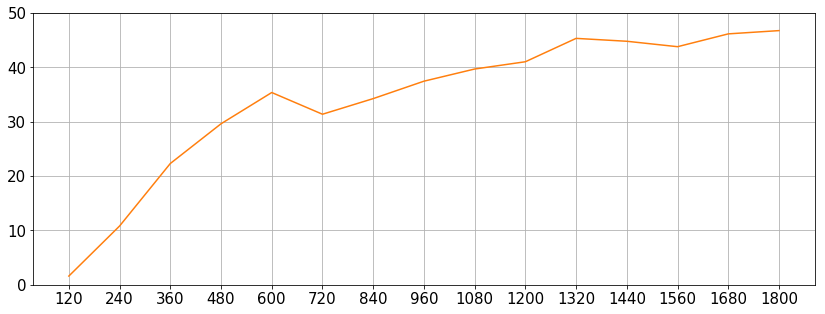

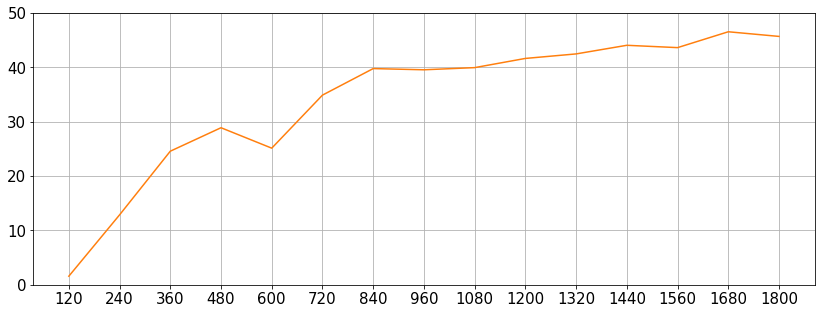

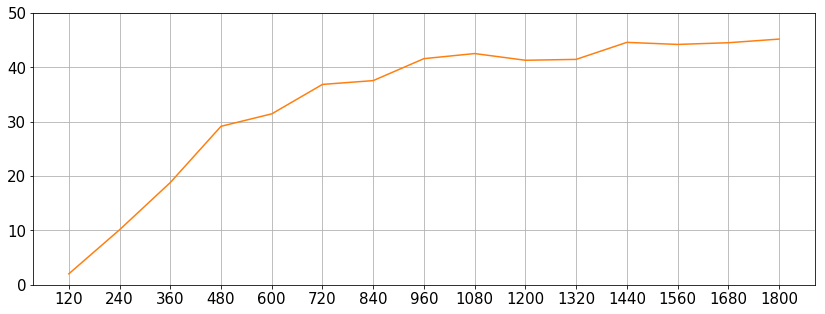

In [35]:
xlist = list(range(1, 16))

fig1 = plt.figure(figsize=(14,5))
plt.ylim(0.0, 50)
plt.xticks(xlist, list(range(120, 120*15+1, 120)), fontsize=15)
plt.yticks(fontsize=15)
plt.plot(xlist, prop_train_err_speeds[0][:15], color="tab:orange")
plt.grid(True)

fig2 = plt.figure(figsize=(14,5))
plt.ylim(0.0, 50)
plt.xticks(xlist, list(range(120, 120*15+1, 120)), fontsize=15)
plt.yticks(fontsize=15)
plt.plot(xlist, prop_train_err_speeds[1][:15], color="tab:orange")
plt.grid(True)

fig3 = plt.figure(figsize=(14,5))
plt.ylim(0.0, 50)
plt.xticks(xlist, list(range(120, 120*15+1, 120)), fontsize=15)
plt.yticks(fontsize=15)
plt.plot(xlist, prop_train_err_speeds[2][:15], color="tab:orange")
plt.grid(True)

### 適用結果の汎化誤差収束速度

In [37]:
dic = defaultdict(list)
y = prop_test_err_speeds
for i, (a,b,c) in enumerate(zip(y[0][:15], y[1][:15], y[2][:15])):
    dic[i] = [a,b,c]
df = pd.DataFrame(dic, index=["1回目", "2回目", "3回目"])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1回目,2.088390,4.545438,20.429554,9.610228,31.689921,32.474331,32.744027,29.475408,41.822461,34.926634,37.320658,33.666288,37.056774,41.649420,30.996817
2回目,6.422807,13.321140,20.509032,12.369925,26.943349,26.210507,19.696514,19.878675,35.798121,44.508005,31.624165,32.656704,39.715161,36.848057,35.868925
3回目,5.151508,16.692965,15.533057,9.703873,27.166298,19.729770,24.667405,20.855070,43.762564,30.758237,31.852627,31.636312,39.613245,28.730358,29.352438


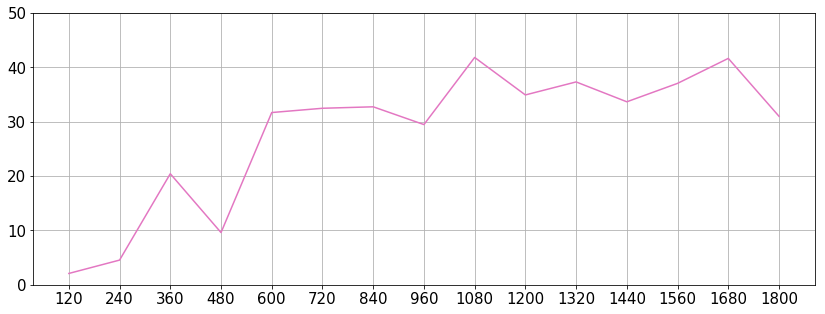

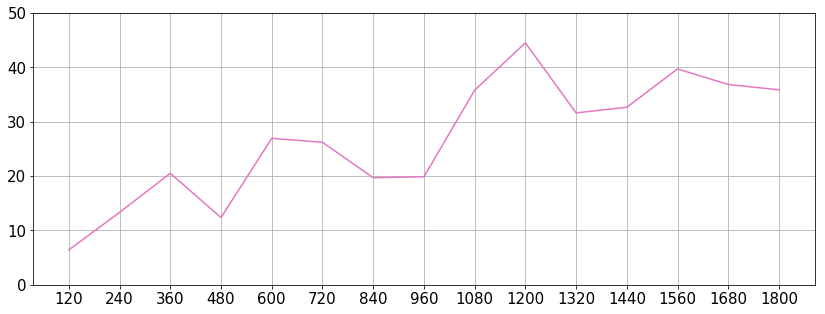

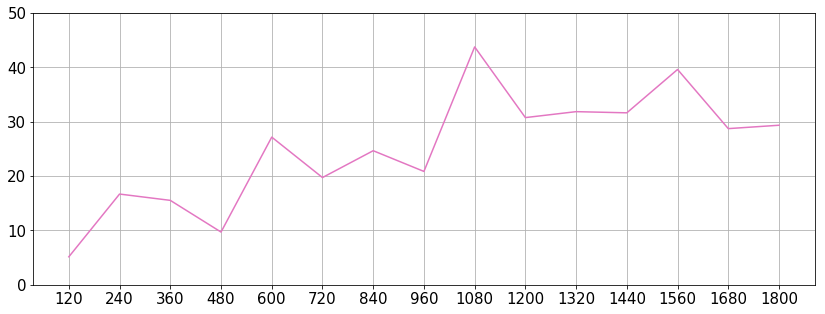

In [38]:
xlist = list(range(1, 16))

fig1 = plt.figure(figsize=(14,5))
plt.ylim(0.0, 50)
plt.xticks(xlist, list(range(120, 120*15+1, 120)), fontsize=15)
plt.yticks(fontsize=15)
plt.plot(xlist, prop_test_err_speeds[0][:15], color="tab:pink")
plt.grid(True)

fig2 = plt.figure(figsize=(14,5))
plt.ylim(0.0, 50)
plt.xticks(xlist, list(range(120, 120*15+1, 120)), fontsize=15)
plt.yticks(fontsize=15)
plt.plot(xlist, prop_test_err_speeds[1][:15], color="tab:pink")
plt.grid(True)

fig3 = plt.figure(figsize=(14,5))
plt.ylim(0.0, 50)
plt.xticks(xlist, list(range(120, 120*15+1, 120)), fontsize=15)
plt.yticks(fontsize=15)
plt.plot(xlist, prop_test_err_speeds[2][:15], color="tab:pink")
plt.grid(True)